In [1]:
'''Libreria para computación númerica rapida'''
import tensorflow as tf
'''Librería para crear directorios'''
import os
'''Lbrería para OpenCv  proporciona funcionalidad enfocada en el desarrollo de aplicaciones de Vision Artificial.'''
import cv2
'''Librería para determinar de imagen contenida en un archivo o bytes'''
import imghdr
'''Librería para trabajar con matrices'''
import numpy as np
'''Librería para visualización de datos y gráfico '''
from matplotlib import pyplot as plt
'''Librería para una pila simple de capas donde cada capa tiene exactamente un tensor de entrada y un tensor de salida'''
from tensorflow.keras.models import Sequential
'''Capa de convolución 2D, esta capa crea un núcleo de convolución que es viento con entrada de capas que ayuda a producir un tensor de salidas'''
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
'''Métricas Keras para calculos de rendimiento'''
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [2]:
'''Genera un tf. datos con el conjunto de datos de archivos de imagen en un directorio.'''
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Mineria/dataset_limpio')

Found 6718 files belonging to 2 classes.


In [3]:
'''Mecanismo principal para enumerar elementos de un tf. datos'''
data_iterator = data.as_numpy_iterator()

In [4]:
'''Devolver un iterador y obtener el primer iterador y sucesivamente'''
batch = data_iterator.next()

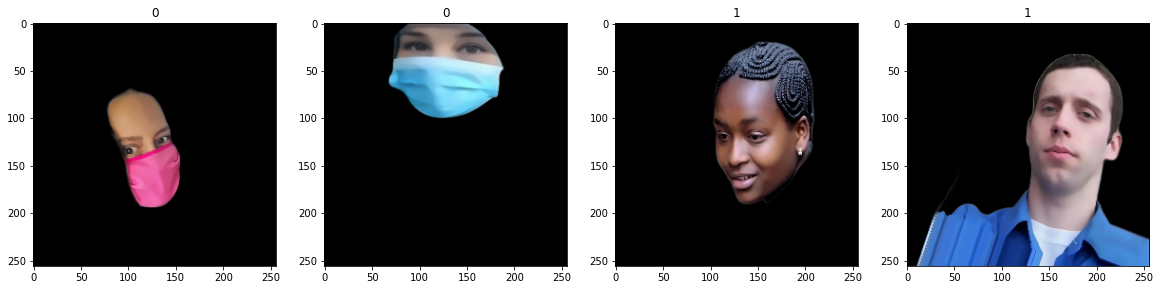

In [5]:
'''Crear figuras y multiples ejes de igual tamaño en un solo eje'''
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
'''Bucle para permitir iterar a través de la secuencia'''
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int)) # Obtener imágenes de tipo int
    ax[idx].title.set_text(batch[1][idx]) # Obtener clase para la imagen

<h1> Modelo

In [6]:
'''Expresión iterable para contruir el modelo'''
data = data.map(lambda x,y: (x/255, y))

In [7]:
'''Devolver un iterador y obtener el primer iterador y sucesivamente'''
data.as_numpy_iterator().next()

(array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+

In [8]:
'''División del 60% de la longitud de los tipos de datos para entrenamiento'''
train_size = int(len(data)*.6)
'''División del 20% de la longitud de los tipos de datos para validación'''
val_size = int(len(data)*.2)
'''División del 20% de la longitud de los tipos de datos para prueba'''
test_size = int(len(data)*.2)

In [9]:
'''Entrenamiento'''
train = data.take(train_size)
'''Validación'''
val = data.skip(train_size).take(val_size)
'''Prueba'''
test = data.skip(train_size+val_size).take(test_size)

<h1> 

In [10]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

<h1> Contruir el modelo

In [11]:
'''Establecer el modelo CNN en modo sequencial'''
model = Sequential()

In [12]:
'''Construir de la clase Keras con parámetro Conv2D,
con numero de filtros 32 de salida en la convolución con activación de unidad lineal rectificada'''
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
'''Agrupación máxima para datos espaciales 2D'''
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
'''Agrupación máxima para datos espaciales 2D'''
model.add(MaxPooling2D())
'''Constructor de la clase Keras con parámetro Conv2D,
con numero de filtros 16 de salida en la convolución'''
model.add(Conv2D(16, (3,3), 1, activation='relu'))
'''Agrupación máxima para datos espaciales 2D'''
model.add(MaxPooling2D())
'''Aplanar los tensores de entrada multidimensionales en una sola dimensión'''
model.add(Flatten())
'''Activación de capas'''
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
'''Compilar el modelo con la lista de métricas para calcular la exactitud y 
la pérdida de entropía cruzada entre las etiquetas verdaderas y las etiquetas predichas.'''
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

<h1> Resumen del modelo
<p> Tabla resumen del modelo informa de la fuerza de la relación entre el modelo y la variable dependiente.

In [14]:
'''Imprimir un resumen útil del modelo, que incluye: 
Nombre y tipo de todas las capas del modelo'''
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [15]:
'''Administrar los direcorios de registros'''
logdir='logs'

In [16]:
'''Devolución de llamada de registros para eventos de Tf, se visualiza
gráficos de las métricas de entrenamiento y prueba'''
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

<h1> Entrenamiento del modelo

In [17]:
'''Entranamiento del modelo con un total de épocas = 20'''
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
126/126 [==============================] - 657s 5s/step - loss: 0.6459 - accuracy: 0.6230 - val_loss: 0.5626 - val_accuracy: 0.7106
Epoch 2/20
126/126 [==============================] - 489s 4s/step - loss: 0.5418 - accuracy: 0.7220 - val_loss: 0.5651 - val_accuracy: 0.7083
Epoch 3/20
126/126 [==============================] - 515s 4s/step - loss: 0.4702 - accuracy: 0.7780 - val_loss: 0.5064 - val_accuracy: 0.7604
Epoch 4/20
126/126 [==============================] - 515s 4s/step - loss: 0.3778 - accuracy: 0.8323 - val_loss: 0.5510 - val_accuracy: 0.7530
Epoch 5/20
126/126 [==============================] - 494s 4s/step - loss: 0.2809 - accuracy: 0.8842 - val_loss: 0.5696 - val_accuracy: 0.7641
Epoch 6/20
126/126 [==============================] - 512s 4s/step - loss: 0.1786 - accuracy: 0.9308 - val_loss: 0.6612 - val_accuracy: 0.7924
Epoch 7/20
126/126 [==============================] - 509s 4s/step - loss: 0.1125 - accuracy: 0.9601 - val_loss: 0.9425 - val_accuracy: 0.7574

<h1> History

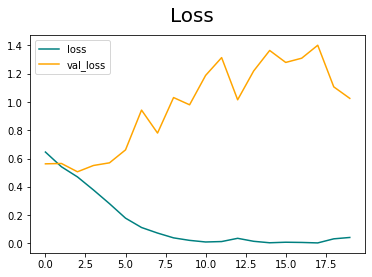

In [18]:
'''Gráfica de historia de perdida del entremaniento'''
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

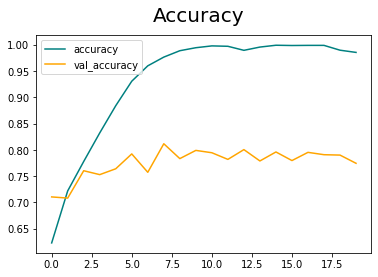

In [19]:
'''Gráfica de historia de exactitud del entremaniento'''
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [20]:
'''Precisión'''
pre = Precision()
'''Recuerdo'''
re = Recall()
'''Precisión Binaria'''
acc = BinaryAccuracy()

In [21]:
'''Agrupar iteraciones para el conjunto de datos'''
for batch in test.as_numpy_iterator(): 
    X, y = batch
    ypred = model.predict(X) # predicción del modelo
    pre.update_state(y, ypred) # variable precisión actualizada
    re.update_state(y, ypred) # variable recall actualizada
    acc.update_state(y, ypred) # variable acc actualizada

In [22]:
# Impresión de las métricas del modelo
print('Exactitud: ',acc.result(), '\nRecall: ',re.result(), '\nPresición: ',pre.result())

Exactitud->  tf.Tensor(0.718502, shape=(), dtype=float32) 
Recall ->  tf.Tensor(0.7613293, shape=(), dtype=float32) 
Presición ->  tf.Tensor(0.6961326, shape=(), dtype=float32)


In [27]:
'''Libreria para  formato de datos jerarquico que se usa en el NILMTK como fuente datos'''
import h5py
model.save('./CNN.h5')